In [4]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [5]:
%matplotlib notebook
import numpy as np
import control as control
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets
from ipywidgets import interact
import scipy.signal as signal
import sympy as sym


## Mechanical systems

#### General mass-spring-damper model
> The mass-spring-damper model consists of discrete mass nodes distributed throughout an object and interconnected via a network of springs and dampers. This model is well-suited for modelling object with complex material properties such as nonlinearity and viscoelasticity. (source: [Wikipedia](https://en.wikipedia.org/wiki/Mass-spring-damper_model "Mass-spring-model"))
#### 1/4 car model
> 1/4 car model is used to analyze the ride quality of automotive suspension systems. Mass $m_1$ is the "sprung mass", which is one-quarter of the vehicle mass that is supported by the suspension system. Mass $m_2$ is the "unsprung mass", which is lumped mass composed of one wheel and half-axle assembly, plus the shock absorber and suspensison springs. The stiffness and damping of the suspension system are modeled by the ideal spring constant $k_1$ and friction coefficient $B$, respecitvely. Tire stifness is modeled by spring constant $k_2$. (source: [Chegg Study](https://www.chegg.com/homework-help/questions-and-answers/figure-p230-shows-1-4-car-model-used-analyze-ride-quality-automotive-suspension-systems-ma-q26244005 "1/4 car model"))

---

### How to use this notebook?
1. Toggle between *mass-spring-damper* and *1/4 car model* system by clicking on a corresponding button.
2. Toggle betweeen *step function*, *impulse function*, *ramp function*, and *sine function* to select the function of the force $F$. 
3. Move the sliders to change the values of the mass ($m$; $m_1$ and $m_2$), spring coefficients ($k$; $k_1$ and $k_2$), damping constant ($B$), input signal amplification and initial conditions ($x_0$, $\dot{x}_0$, $y_0$, $\dot{y}_0$).

<table>
    <tr>
        <th style="text-align:center">Mass-spring-damper</th>
        <th style="text-align:center">1/4 car model</th>
    </tr>
    <tr>
        <td style="width:170px; height:150px"><img src='img/mass-spring-damper.png'></td>
        <td style="width:280px; height:150px"><img src='img/car_model.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

<IPython.core.display.Javascript object>


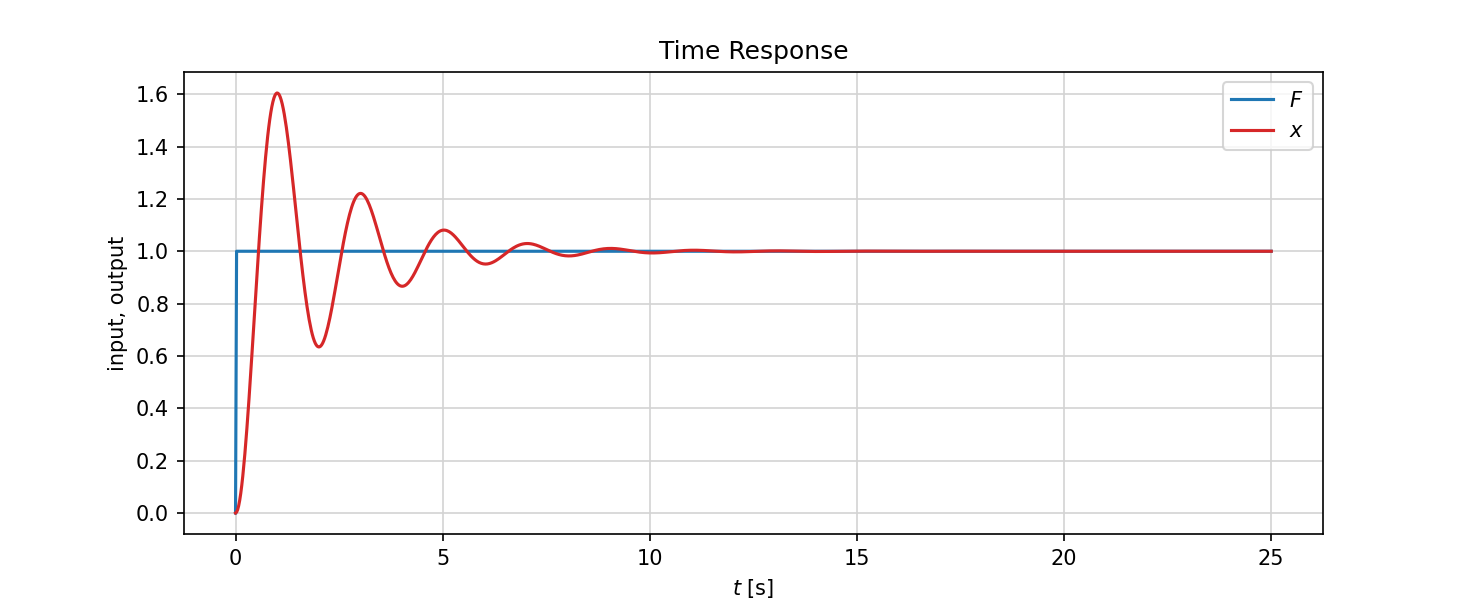

ToggleButtons(description='Select system: ', options=(('mass-spring-damper', 0), ('1/4 car model', 1)), style=…

ToggleButtons(description='Select $F$ function: ', options=(('step function', 0), ('impulse function', 1), ('r…

Output()

In [6]:
# create figure
fig = plt.figure(figsize=(9.8, 4),num='Mechanical systems')

# add sublot
ax = fig.add_subplot(111)
ax.set_title('Time Response')
ax.set_ylabel('input, output')
ax.set_xlabel('$t$ [s]')

ax.grid(which='both', axis='both', color='lightgray')

inputf, = ax.plot([], [])
responsef, = ax.plot([], [])
responsef2, = ax.plot([], [])
arrowf, = ax.plot([],[])

style = {'description_width': 'initial'}

selectSystem=widgets.ToggleButtons(
    options=[('mass-spring-damper',0),('1/4 car model',1)],
    description='Select system: ', style=style) # define toggle buttons
selectForce = widgets.ToggleButtons(
    options=[('step function', 0), ('impulse function', 1), ('ramp function', 2), ('sine function', 3)],
    description='Select $F$ function: ', style=style)
display(selectSystem)
display(selectForce)

def build_model(M,K,B,M1,M2,B1,K1,K2,amp,x0,xpika0,select_System,index):

    num_of_samples = 1000
    total_time = 25
    t = np.linspace(0, total_time, num_of_samples) # time for which response is calculated (start, stop, step)
    
    global inputf, responsef, responsef2, arrowf
    
    if select_System==0:
        
        system0 = control.TransferFunction([1], [M, B, K])
        
        if index==0:
            inputfunc = np.ones(len(t))*amp
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0*M]) 
            inputfunc[0]=0
            
        elif index==1:
            inputfunc=signal.unit_impulse(1000, 0)*amp
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0*M]) 
    
        elif index==2:
            inputfunc=t;
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0*M]) 
       
        elif index==3:
            inputfunc=np.sin(t)*amp
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0*M])    
    
    elif select_System==1:
        
        system1 = control.TransferFunction([B1*K2, K1*K2],[M1*M2, M1*B1+M2*B1, M1*K1+M1*K2+M2*K1, B1*K2, K1*K2])
        system2 = control.TransferFunction([M1*K2, B1*K2, K1*K2],[M1*M2, M1*B1+M2*B1, M1*K1+M1*K2+M2*K1, B1*K2, K1*K2])
        
        if index==0:
            inputfunc = np.ones(len(t))*amp
                 
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,0,0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0])
            inputfunc[0]=0
        
        elif index==1:
            inputfunc=signal.unit_impulse(1000, 0)*amp
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,0,0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0])
       
        elif index==2:
            inputfunc=t;
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,0,0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0])
        
        elif index==3:
            inputfunc=np.sin(t)*amp
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,0,0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0])

    
    ax.lines.remove(responsef)
    ax.lines.remove(inputf)
    ax.lines.remove(responsef2)
    ax.lines.remove(arrowf)
    
    inputf, = ax.plot(t,inputfunc,label='$F$',color='C0')
    responsef, = ax.plot(time, response,label='$x$',color='C3')
    
    if select_System==1:
        responsef2, = ax.plot(time, response2,label='$y$',color='C2')
    elif select_System==0:
        responsef2, = ax.plot([],[])
        
    if index==1:
        if amp>0:
            arrowf, = ax.plot([-0.1,0,0.1],[amp-((amp*0.05)/2),amp,amp-((amp*0.05)/2)],color='C0',linewidth=4)
        elif amp==0:
            arrowf, = ax.plot([],[])
        elif amp<0:
            arrowf, = ax.plot([-0.1,0,0.1],[amp-((amp*0.05)/2),amp,amp-(amp*(0.05)/2)],color='C0',linewidth=4)
    else:
        arrowf, = ax.plot([],[])
    
    ax.relim()
    ax.autoscale_view()
    
    ax.legend()    
    
def update_sliders(index):
    global m1_slider, b1_slider, k1_slider, m21_slider, m22_slider, b2_slider, k21_slider, k22_slider
    global x0_slider, xpika0_slider

    m1val = [0.1,0.1,0.1,0.1]
    k1val = [1,1,1,1]
    b1val = [0.1,0.1,0.1,0.1]
    m21val = [0.1,0.1,0.1,0.1]
    m22val = [0.1,0.1,0.1,0.1]
    b2val = [0.1,0.1,0.1,0.1]
    k21val = [1,1,1,1]
    k22val = [1,1,1,1]
    x0val = [0,0,0,0]
    xpika0val = [0,0,0,0]
    y0val = [0,0,0,0]
    ypika0val = [0,0,0,0]
    
    m1_slider.value = m1val[index]
    k1_slider.value = k1val[index]
    b1_slider.value = b1val[index]
    m21_slider.value = m21val[index]
    m22_slider.value = m22val[index]
    b2_slider.value = b2val[index]
    k21_slider.value = k21val[index]
    k22_slider.value = k22val[index]
    x0_slider.value = x0val[index]
    xpika0_slider.value = xpika0val[index]
    
def draw_controllers(type_select,index):
    
    global m1_slider, b1_slider, k1_slider, m21_slider, m22_slider, b2_slider, k21_slider, k22_slider
    global x0_slider, xpika0_slider
    
    if type_select==0:
        
        amp_slider = widgets.FloatSlider(value=1.,min=-2.,max=2.,step=0.1,
            description='Input signal amplification:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',style=style)
            
        m1_slider = widgets.FloatSlider(value=.1, min=.01, max=1., step=.01,
                                        description='$m$ [kg]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        k1_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
                                       description='$k$ [N/m]:',disabled=False,continuous_update=False,
                                       orientation='horizontal',readout=True,readout_format='.1f',)
        b1_slider = widgets.FloatSlider(value=.1,min=0.0,max=0.5,step=.01,
                                        description='$B$ [Ns/m]:',disabled=False,continuous_update=False,
                                        rientation='horizontal',readout=True,readout_format='.2f',)
        m21_slider = widgets.FloatSlider(value=.1,min=.01,max=1.,step=.01,
            description='$m_1$ [kg]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        m22_slider = widgets.FloatSlider(value=.1,min=.0,max=1.,step=.01,
            description='$m_2$ [kg]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        b2_slider = widgets.FloatSlider(value=.1,min=0.0,max=2,step=.01,
            description='$B$ [Ns/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        k21_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_1$ [N/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        k22_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_2$ [N/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        
        x0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='$x_0$ [dm]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        xpika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='${\dot{x}}_0$ [dm/s]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
    
        #y0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
        #                                description='$y_0$ [dm]:',disabled=True,continuous_update=False,
        #                                orientation='horizontal',readout=True,readout_format='.2f',)
        #ypika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
        #                                description='${\dot{y}}_0$ [dm/s]:',disabled=True,continuous_update=False,
        #                                orientation='horizontal',readout=True,readout_format='.2f',)
    elif type_select==1:
        
        amp_slider = widgets.FloatSlider(value=1.,min=-2.,max=2.,step=0.1,
            description='Input signal amplification:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',style=style)
            
        m1_slider = widgets.FloatSlider(value=.1, min=.01, max=1., step=.01,
                                        description='$m$ [kg]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        k1_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
                                       description='$k$ [N/m]:',disabled=True,continuous_update=False,
                                       orientation='horizontal',readout=True,readout_format='.1f',)
        b1_slider = widgets.FloatSlider(value=.1,min=0.0,max=0.5,step=.01,
                                        description='$B$ [Ns/m]:',disabled=True,continuous_update=False,
                                        rientation='horizontal',readout=True,readout_format='.2f',)
        m21_slider = widgets.FloatSlider(value=.1,min=.01,max=1.,step=.01,
            description='$m_1$ [kg]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        m22_slider = widgets.FloatSlider(value=.1,min=.0,max=1.,step=.01,
            description='$m_2$ [kg]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        b2_slider = widgets.FloatSlider(value=.1,min=0.0,max=2,step=.01,
            description='$B$ [Ns/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        k21_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_1$ [N/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        k22_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_2$ [N/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        
        x0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='$x_0$ [dm]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        xpika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='${\dot{x}}_0$ [dm/s]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
    
        #y0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
        #                                description='$y_0$ [dm]:',disabled=True,continuous_update=False,
        #                                orientation='horizontal',readout=True,readout_format='.2f',)
        #ypika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
        #                                description='${\dot{y}}_0$ [dm/s]:',disabled=True,continuous_update=False,
        #                                orientation='horizontal',readout=True,readout_format='.2f',)    
    input_data = widgets.interactive_output(build_model, {'M':m1_slider, 'K':k1_slider, 'B':b1_slider, 'M1':m21_slider,
                                                    'M2':m22_slider, 'B1':b2_slider, 'K1':k21_slider, 'K2':k22_slider, 'amp':amp_slider,
                                                    'x0':x0_slider,'xpika0':xpika0_slider,      
                                                    'select_System':selectSystem,'index':selectForce})  
    
    input_data2 = widgets.interactive_output(update_sliders, {'index':selectForce})
  
    box_layout = widgets.Layout(border='1px solid black',
                    width='auto',
                    height='',
                    flex_flow='row',
                    display='flex')

    buttons1=widgets.HBox([widgets.VBox([amp_slider],layout=widgets.Layout(width='auto')),
                         widgets.VBox([x0_slider,xpika0_slider])],layout=box_layout)
    display(widgets.VBox([widgets.Label('Select the values of the input signal amplification and intial conditions:'), buttons1]))
    display(widgets.HBox([widgets.VBox([m1_slider,k1_slider,b1_slider], layout=widgets.Layout(width='45%')),
                          widgets.VBox([m21_slider,m22_slider,k21_slider,k22_slider,b2_slider], layout=widgets.Layout(width='45%'))]), input_data)
    
widgets.interactive_output(draw_controllers, {'type_select':selectSystem,'index':selectForce})